In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from datasets import load_dataset
import os 
import copy

(array([622., 390., 300., 242., 260., 240., 218., 260., 293., 320., 359.]),
 array([-0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
         0.85,  0.95,  1.05]),
 <BarContainer object of 11 artists>)

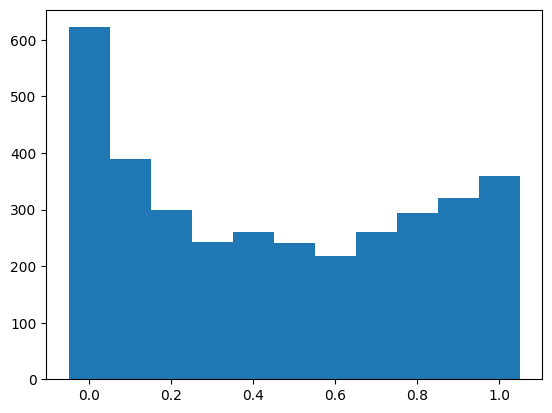

In [36]:
plt.hist(np.load("ckpts/math_amrith_easy_deepseek_3epochs_0copies_lr2e-05_bs128/unmemorized_acc_cummax_all.npy")[-1], bins=np.arange(0, 1.2, 0.1)-0.05)
# plt.savefig("delete.png")

In [8]:
(np.load("ckpts/math_amrith_easy_deepseek_3epochs_0copies_lr2e-05_bs128/unmemorized_acc_cummax_all.npy")[-1]<=0.75).mean()

0.7226027397260274

In [53]:
run_name = "math_amrith_easy_3epochs_prev{prev{prev{0copies}}}_lr2e-05_bs128"
# run_name = "math_amrith_easy_3epochs_7copies_lr2e-05_bs128"

ckpt = "657"

samples = np.load(f"ckpts/{run_name}/checkpoint-{ckpt}/test_easy_answers5_seed2.npy")

In [54]:

answer_types_all = []
answers_all = []
for i in range(len(samples)):
    answer_types = []
    answers = []
    for item in samples[i]:
        answers.append(item)
        answer_type = answer_type_individial(item, eval_answers[i])
        answer_types.append(answer_type)
    answer_types_all.append(answer_types)
    answers_all.append(answers)

answer_types_all = np.array(answer_types_all)
answers_all = np.array(answers_all)
print((answer_types_all==0).mean(axis=-1).mean())
print((answer_types_all==1).mean(axis=-1).mean())
print((answer_types_all==2).mean(axis=-1).mean())

0.3584890333062551
0.6293257514216084
0.012185215272136474


In [46]:
from is_eq import is_equiv

def last_boxed_only_string(string):
    idx = string.rfind("\\boxed")
    if idx < 0:
        idx = string.rfind("\\fbox")
        if idx < 0:
            return None
    i = idx
    right_brace_idx = None
    num_left_braces_open = 0
    while i < len(string):
        if string[i] == "{":
            num_left_braces_open += 1
        if string[i] == "}":
            num_left_braces_open -= 1
            if num_left_braces_open == 0:
                right_brace_idx = i
                break
        i += 1
    
    if right_brace_idx == None:
        retval = None
    else:
        retval = string[idx:right_brace_idx + 1]
    
    return retval

def remove_boxed(s):
    left = "\\boxed{"
    try:
        assert s[:len(left)] == left
        assert s[-1] == "}"
        return s[len(left):-1]
    except:
        return None

def get_aug_answer(full_answer):
    answer_phrases = ["FINAL ANSWER", "answer is", "ANSWER", "Final Answer", "is:", "Answer", "answer"]
    
    for answer in answer_phrases:
        idx = full_answer.rfind(answer)
        if idx != -1:
            answer = full_answer[idx + len(answer):]
            answer = answer.replace(":", "").replace("$", "").replace("\n", "").strip()
            if len(answer)> 0:
                if answer[-1] == ".":
                    answer = answer[:-1]
                left = "\\boxed{"
                if answer[:len(left)] == left and answer[-1] == "}":
                    answer = answer[len(left):-1]
            return answer 
    return None

def answer_type_individial(output , answer):
    # if args.eval_type == "test" or args.eval_type == "train" or args.eval_type == "test_small":
    #     answer = remove_boxed(last_boxed_only_string(answer))
    # else:
    #     answer = get_aug_answer(answer)
    answer = remove_boxed(last_boxed_only_string(answer))
    output_answer = remove_boxed(last_boxed_only_string(output))
    if output_answer == None:
        output_answer = get_aug_answer(output)

    if output_answer is not None:
        
        eqiv = is_equiv(answer, output_answer, verbose=False)

        if eqiv:
            answer_type = 0
        else:
            answer_type = 1
    else:
        answer_type = 2
    return answer_type



0.269374492282697
0.7171405361494719
0.013484971567831032


In [36]:
for answer in answers_all.flatten()[np.where(answer_types_all.flatten()==2)[0]]:
    print(answer[-20:])

 = \frac{13}{2}.$$At
approximately 0.867.
 3^{\frac{2}{6}} = 3

   \]
Given $x = z$
rkers are needed.
30
e equation is **0**.
he expression is 16.
x = 4.8 - 3 = 1.8
  
numbers are $49$ and
lue of \(x\) is 5.
5
approximately:
4.595
 sequence is **11**.
the sombrero is $10.
\(xy\) is \(20\).
20
s approximately:
5.3
25}\right) + 24 - 16
{8}\right) + 12 = 15
 Figure 5 is **20**.
sion:
\[
3n^2 - 8
\]
 2\),
    \[
    z =
-22x - 10z + \frac{7
 = \frac{8}{3} l \]

h the quarters:
   \
textbf{Done.} \]1/15
 by 10,000 is **1**.
4, 6, 8, 10, 12
This
) = (2 \times 1) + (
Therefore, $n = 52$.
}{3}\\
&=\dbinom{4}{
! ( -> Sum of digits
{1}{2} \cdot (AB) =\
r angle:
100 degrees
 = \frac{1}{2}$.
0.5
 degrees is 0.5.
0.5
x + 18 = 20 \]
\[ 2x
pproximately:
45.312
\]
cubic decimeters.
pproximately:
0.7809
 an arithmetic value
value of $x$ is 140.
 \frac{1}{2} \).
0.5
\circ - \frac{x}{2}\
20}} \]
\[ R = \frac
asures:
300 degrees.
**84** square units.
ly:
- We correct our
he approximation:
\[
 + 2y^3) + x^

In [10]:
np.load("ckpts/math_amrith_easy_instruct_3epochs_3copies_lr2e-05_bs128/checkpoint-327/test_easy_answers5_seed2.npy").flatten()[47]

" Let's define the weights of treeks, squigs, and goolees as \\( t \\) (treek weight), \\( s \\) (squig weight), and \\( g \\) (goolee weight) respectively. We are given two equations based on the problem:\n1. \\( 10t = 3s + g \\)\n2. \\( 2t + g = s \\)\nWe need to find an expression for \\( s \\) in terms of \\( t \\) and \\( g \\), i.e., \\( s = ? \\). To do this, we will manipulate the given equations.\nStart with the second equation:\n\\[ 2t + g = s \\]\nFrom this, we solve for \\( g \\):\n\\[ g = s - 2t \\]\nNow substitute \\( g \\) from this equation into the first equation:\n\\[ 10t = 3s + (s - 2t) \\]\n\\[ 10t = 4s - 6t \\]\nAdd \\( 6t \\) to both sides to get all the \\( t \\) terms on one side:\n\\[ 16t = 4s \\]\nNow solve for \\( s \\):\n\\[ s = \\frac{16t}{4} \\]\n\\[ s = 4t \\]\nThus, the weight of one squig in terms of treek weight is \\( 4t \\).\nFINAL ANSWER:\n4"

In [8]:
np.load("ckpts/math_amrith_easy_instruct_3epochs_3copies_lr2e-05_bs128/checkpoint-327/test_easy_answers5_seed2.npy").flatten()[0]

' The graph of $y=\\frac{2}{x^2+x-6}$ has vertical asymptotes where the denominator is equal to zero, which is at $x=\\pm\\sqrt{6-2}=\\pm\\sqrt{4}=2,-2$. So there are $\\boxed{2}$ asymptotes.\nFINAL ANSWER:\n2'

In [23]:
def get_level(level_str):
    if level_str[-1] == "?":
        return -1 
    else:
        return int(level_str[-1])

dataset = load_dataset("hendrycks/competition_math")
test_questions = np.array(dataset["test"]["problem"])
test_answers = np.array(dataset["test"]['solution'])
test_levels_orig = np.array(dataset["test"]['level'])
test_levels_orig = np.array(list(map(get_level, test_levels_orig)))
test_easy_idxs = np.where((test_levels_orig>=1)*(test_levels_orig<=3))[0]

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [33]:
subsample_idxs = np.where(test_levels_orig[test_easy_idxs]==2)[0]

checkpoint-81
checkpoint-162
checkpoint-327
checkpoint-657
checkpoint-1149
checkpoint-1641
checkpoint-81
checkpoint-162
checkpoint-327
checkpoint-657
checkpoint-984
checkpoint-1149
checkpoint-162
checkpoint-327
checkpoint-657
checkpoint-984
checkpoint-1149
checkpoint-162
checkpoint-327
checkpoint-657
checkpoint-984
checkpoint-1149


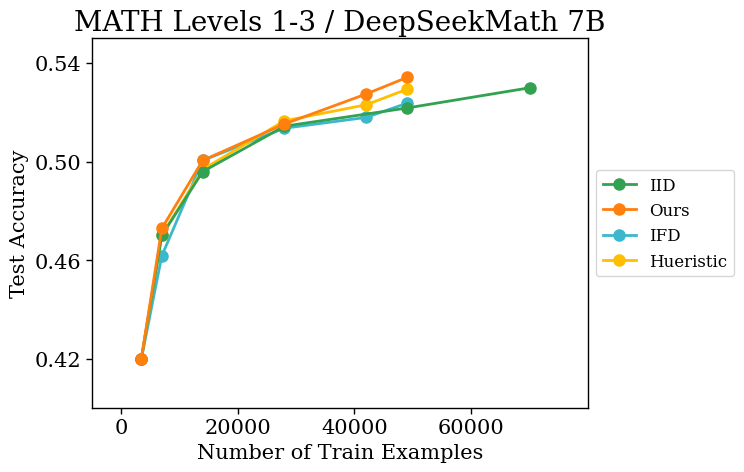

In [5]:
# import matplotlib as mpl
# import matplotlib.font_manager as font_manager

# mpl.rcParams['font.family']='serif'
# cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
# mpl.rcParams['font.serif']=cmfont.get_name()
# mpl.rcParams['mathtext.fontset']='cm'
# mpl.rcParams['axes.unicode_minus']=False
# import matplotlib.pyplot as plt

from palettable.cartocolors.qualitative import Vivid_4
palette = 'CMRmap'

from palettable.tableau import GreenOrange_6


plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'DejaVu Serif',
})

accs_orig = []
num_expls_all = []
for num_copies in [ 0, 1, 3, 7, 13, 19]:
    
    file_name = f"math_amrith_easy_deepseek_3epochs_{num_copies}copies_lr2e-05_bs128"
    ckpts = sorted([
    f for f in os.listdir("ckpts/"+file_name) if os.path.isdir(os.path.join("ckpts/"+file_name, f))
    ], key=lambda x: int(x.split('-')[1]))
    print(ckpts[-1])
    try:
        acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types5_seed2.npy")==0)[:, :].mean()
    except:
        try:
            acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types20_seed2_temp0.8.npy")==0)[:, :].mean()
        except:
            try:
                acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_easy_answer_types5_seed2.npy")==0)[:, :].mean()
            except:
                acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_easy_answer_types5_seed4.npy")==0)[:, :].mean()

    num_expls = 3504 + num_copies*3504
    num_expls_all.append(num_expls)
    accs_orig.append(acc)
    


plt.plot(2**np.log2(num_expls_all), np.array(accs_orig), "o-", label = "IID", linewidth=2, alpha=1, markersize=8,zorder=50, color=GreenOrange_6.mpl_colors[0])

# plt.plot(2**np.log2(num_expls_all), np.array(accs_orig), "o-", linewidth=4, alpha=0.3, markersize=10)
# plt.scatter(2**np.log2(num_expls_all), np.array(accs_orig), label = "IID", linewidth=4, alpha=0.8, s=40)


accs = []
num_expls_all = []
for num_copies in [0,   1, 2, 3, 4, 5]:
    file_name = "0copies"
    for j in range(num_copies):
        file_name = "prev{"+file_name+"}"
    # if num_copies == 4:
    #     file_name = f"math_amrith_easy_deepseek_3epochs_"+file_name+"_lr2e-05_bs128_6more"
    # else:
    file_name = f"math_amrith_easy_deepseek_3epochs_"+file_name+"_lr2e-05_bs128"
    ckpts = sorted([
    f for f in os.listdir("ckpts/"+file_name) if os.path.isdir(os.path.join("ckpts/"+file_name, f))
    ], key=lambda x: int(x.split('-')[1]))
    print(ckpts[-1])
    try:
        acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types5_seed2.npy")==0)[:, :].mean()
    except:
        try:
            acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types20_seed2_temp0.8.npy")==0)[:, :].mean()
        except:
            acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_easy_answer_types5_seed2.npy")==0)[:, :].mean()


    additional_examples = np.load(f"ckpts/{file_name}/amrith_easy_data_subsample_idxs.npy")
    num_expls = 3504 + len(additional_examples)
    num_expls_all.append(num_expls)
    accs.append(acc)

plt.plot(2**np.log2(num_expls_all), np.array(accs), "o-", label = "Ours", linewidth=2, alpha=1, markersize=8, zorder=50, color=GreenOrange_6.mpl_colors[1])

# plt.plot(2**np.log2(num_expls_all), np.array(accs), "o-", linewidth=4, alpha=0.3, markersize=10)
# plt.scatter(2**np.log2(num_expls_all), np.array(accs), label = "Ours", linewidth=4, alpha=0.8, s=40)

accs = [accs_orig[0]]
num_expls_all = [3504]
for num_copies in [ 1, 3, 7, 11, 13]:
    
    file_name = f"math_amrith_easy_deepseek_ifd_3epochs_{num_copies}copies_25percentile_lr2e-05_bs128"
    ckpts = sorted([
    f for f in os.listdir("ckpts/"+file_name) if os.path.isdir(os.path.join("ckpts/"+file_name, f))
    ], key=lambda x: int(x.split('-')[1]))
    print(ckpts[-1])
    try:
        acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types5_seed2.npy")==0)[:, :].mean()
    except:
        try:
            acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types20_seed2_temp0.8.npy")==0)[:, :].mean()
        except:
            try:
                acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_easy_answer_types5_seed2.npy")==0)[:, :].mean()
            except:
                acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_easy_answer_types5_seed4.npy")==0)[:, :].mean()

    num_expls = 3504 + num_copies*3504
    num_expls_all.append(num_expls)
    accs.append(acc)


plt.plot(2**np.log2(num_expls_all), np.array(accs), "o-", label = "IFD", linewidth=2, alpha=1, markersize=8, color=GreenOrange_6.mpl_colors[2])
# plt.plot(2**np.log2(num_expls_all), np.array(accs), "o-", linewidth=4, alpha=0.3, markersize=10)
# plt.scatter(2**np.log2(num_expls_all), np.array(accs), label = "IFD", linewidth=4, alpha=0.8, s=40)


accs = [accs_orig[0]]
num_expls_all = [3504]
for num_copies in [ 1, 3, 7, 11, 13]:
    
    file_name = f"math_amrith_easy_deepseek_huer_3epochs_{num_copies}copies_25percentile_lr2e-05_bs128"
    ckpts = sorted([
    f for f in os.listdir("ckpts/"+file_name) if os.path.isdir(os.path.join("ckpts/"+file_name, f))
    ], key=lambda x: int(x.split('-')[1]))
    print(ckpts[-1])
    try:
        acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types5_seed2.npy")==0)[:, :].mean()
    except:
        try:
            acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_answer_types20_seed2_temp0.8.npy")==0)[:, :].mean()
        except:
            try:
                acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_easy_answer_types5_seed2.npy")==0)[:, :].mean()
            except:
                acc = (np.load(f"ckpts/{file_name}/{ckpts[-1]}/test_easy_answer_types5_seed4.npy")==0)[:, :].mean()

    num_expls = 3504 + num_copies*3504
    num_expls_all.append(num_expls)
    accs.append(acc)

plt.plot(2**np.log2(num_expls_all), np.array(accs), "o-", label = "Hueristic", linewidth=2, alpha=1, markersize=8,  color=([1        , 0.75098039, 0.00019608]))

# plt.plot(2**np.log2(num_expls_all), np.array(accs), "o-", linewidth=4, alpha=0.3, markersize=10)
# plt.scatter(2**np.log2(num_expls_all), np.array(accs), label = "Hueristic", linewidth=4, alpha=0.8, s=40)

# plt.legend()
# plt.title("MATH")
# plt.savefig("delete.png")

plt.xlabel("Number of Train Examples", fontsize=15)

plt.ylabel("Test Accuracy", fontsize=15)
# plt.legend()
plt.title("MATH Levels 1-3 / DeepSeekMath 7B", fontsize=20)

plt.xticks([0, 20000, 40000, 60000,], fontsize=15)
plt.yticks([0.42, 0.46, 0.5, 0.54], fontsize=15)
plt.ylim(0.4, 0.55)
plt.xlim(-5000, 80000)

plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)
plt.tick_params(width=1, length=4)


# plt.rcParams.update({
#     'family':'serif',
#     'serif':['Computer Modern Roman']
# })

# add legend to right side

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

In [32]:
import seaborn as sns

In [34]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [55]:
np.array(GreenOrange_6.mpl_colors[3])

array([1.        , 0.85098039, 0.29019608])

In [44]:
GreenOrange_6.mpl_colors

[(0.19607843137254902, 0.6352941176470588, 0.3176470588235294),
 (1.0, 0.4980392156862745, 0.058823529411764705),
 (0.23529411764705882, 0.7176470588235294, 0.8),
 (1.0, 0.8509803921568627, 0.2901960784313726),
 (0.2235294117647059, 0.45098039215686275, 0.48627450980392156),
 (0.7215686274509804, 0.35294117647058826, 0.050980392156862744)]

In [136]:
accs = np.array(accs)

accs[1:] - accs[:-1]

array([0.05004062, 0.02591389, 0.01844029])

In [13]:
file_name = "math_amrith_easy_3epochs_prev{prev{prev{0copies}}}_lr2e-05_bs128"
additional_examples = np.load(f"ckpts/{file_name}/amrith_easy_data_subsample_idxs.npy")

In [18]:
file_name = "math_amrith_easy_3epochs_prev{prev{0copies}}_lr2e-05_bs128"
unmemorized_acc_cummax_all = np.load(f"ckpts/{file_name}/unmemorized_acc_cummax_all.npy")

In [20]:
unmemorized_acc_cummax_all[-1][additional_examples%3504]

array([0.6, 0.7, 0.1, ..., 0.7, 0.7, 0.1])

(array([   0., 6950., 3357., 2605., 2312., 2016., 1981., 2081., 1956.,
         514.,  375.,  381.]),
 array([-0.15, -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,
         0.75,  0.85,  0.95,  1.05]),
 <BarContainer object of 12 artists>)

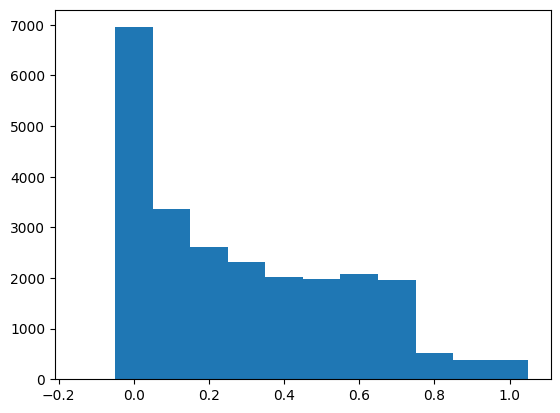

In [25]:
plt.hist(unmemorized_acc_cummax_all[-1][additional_examples%3504], np.arange(-0.1, 1.1, 0.1)-0.05)

(array([  0., 770., 367., 290., 260., 229., 229., 239., 235., 252., 249.,
        384.]),
 array([-0.15, -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,
         0.75,  0.85,  0.95,  1.05]),
 <BarContainer object of 12 artists>)

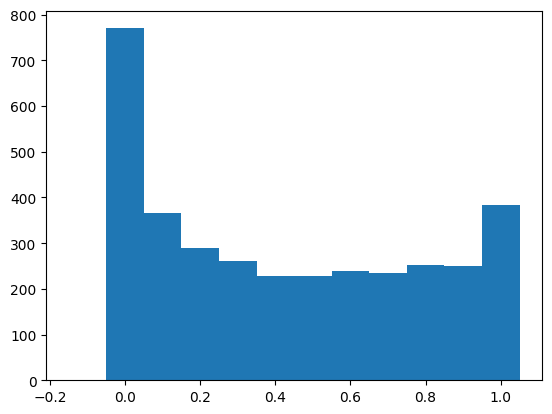

In [26]:
plt.hist(unmemorized_acc_cummax_all[-1], np.arange(-0.1, 1.1, 0.1)-0.05)

In [9]:
len(additional_examples)/7

3504.0

In [3]:

def get_stats(train_name):
    train_accs_all = []
    perplexities_all = []


    ckpts = sorted([
    f for f in os.listdir("ckpts/"+train_name) if os.path.isdir(os.path.join("ckpts/"+train_name, f))
    ], key=lambda x: int(x.split('-')[1]))
    # print(ckpts)

    for ckpt in ckpts:
        try:
            train_correct = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answer_types5_seed2_temp0.8.npy")==0)
            
        except:
            try: 
                train_correct = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answer_types50_seed2_temp0.8.npy")==0)
            except: 
                try:
                    train_correct = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answer_types10_seed2.npy")==0)
                except:
                    train_correct = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answer_types5_seed2.npy")==0)
        train_accs = train_correct.mean(axis=-1)
        train_accs_all.append(train_accs)
        
        perplexities = np.load("ckpts/"+train_name+"/"+ckpt+ "/train_perplexities.npy")
        perplexities_all.append(perplexities)
        
    train_accs_all = np.array(train_accs_all)
    perplexities_all = np.array(perplexities_all)
    
    test_accs_all = []

    for ckpt in ckpts:
        try:
            test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types50_seed2.npy")==0)
        except:
            try:
                test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types50_seed2_temp0.8.npy")==0)
            except:
                try:
                    test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types5_seed2_temp0.8.npy")==0)
                except:
                    try:
                        test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types20_seed2_temp0.8.npy")==0)
                    except:
                        test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types5_seed2.npy")==0)
        test_accs_all.append(test_accs)

    test_accs_all = np.array(test_accs_all)
    
    return_dict = {}
    return_dict["train_accs_all"] = train_accs_all
    return_dict["perplexities_all"] = perplexities_all
    return_dict["test_accs_all"] = test_accs_all
    
    return return_dict




def get_ratios2(stats_dict, perp_threshold=-2.4):
    train_accs_all = stats_dict["train_accs_all"]
    perplexities_all = stats_dict["perplexities_all"]
    test_accs_all = stats_dict["test_accs_all"]
    
    memorization_mask = np.ones(train_accs_all.shape)*-1
    accs_all = np.ones(train_accs_all.shape)*-1
    
    for i in range(len(train_accs_all)):

        accs_all[i] =train_accs_all[i]
        
        memorization_mask[i] = (np.log(np.log((perplexities_all[i]))) >= perp_threshold)
    
    
    
    
    unmemorized_acc_cummax = np.array([(accs_all*memorization_mask)[:j+1].max(axis=0) for j in range(len(train_accs_all))])
    
    # print(unmemorized_acc_cummax.shape)
    # print(accs_all.shape)
    unmemorized_acc_cummax = (np.min([unmemorized_acc_cummax, accs_all], axis=0))
    unmemorized_acc_cummax_mean = unmemorized_acc_cummax.mean(axis=1)
    

    avg_test_acc = test_accs_all.mean(axis=-1).mean(axis=1)
    
    
    
    return_dict = {}
    
    
    return_dict["unmemorized_acc_cummax"] = unmemorized_acc_cummax_mean
    return_dict["unmemorized_acc_cummax_all"] = unmemorized_acc_cummax

    return_dict["avg_test_acc"] = avg_test_acc
            
    return return_dict


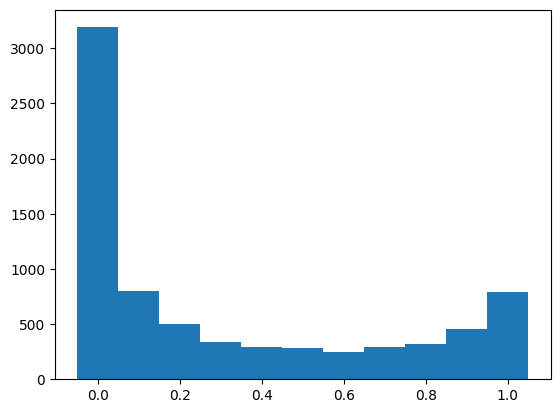

In [14]:
file_name = "math_amrith_3epochs_3copies_lr2e-05_bs24"
plt.hist(np.load("ckpts/"+file_name+"/unmemorized_acc_cummax_all.npy")[-1], np.arange(0, 1.2, 0.1)-0.05)
plt.savefig("delete.png")

In [4]:
file_name = "math_amrith_3epochs_prev{prev{3copies}}_lr2e-05_bs24"
stats_dict = get_stats(file_name)
ratio_dict = get_ratios2(stats_dict, perp_threshold=-1.7)
np.save("ckpts/"+file_name+"/unmemorized_acc_cummax_all.npy", ratio_dict["unmemorized_acc_cummax_all"])

In [28]:
file_name = f"math_amrith_3epochs_{7}copies_lr2e-05_bs24"
stats_dict = get_stats(file_name)
ratio_dict = get_ratios2(stats_dict, perp_threshold=-1.7)
np.save("ckpts/"+file_name+"/unmemorized_acc_cummax_all.npy", ratio_dict["unmemorized_acc_cummax_all"])

(array([2989., 1817.,  608.,  588.,  318., 1180.]),
 array([-0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1]),
 <BarContainer object of 6 artists>)

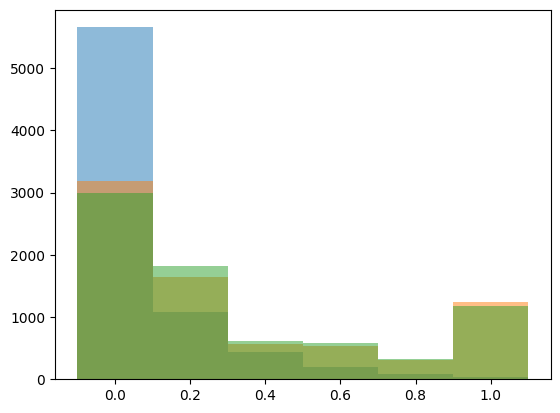

In [25]:

stats_dict = get_stats(f"math_amrith_3epochs_{0}copies_lr2e-05_bs24")
ratio_dict = get_ratios2(stats_dict, perp_threshold=-1.7)
plt.hist(ratio_dict["unmemorized_acc_cummax_all"][-1], bins = np.arange(0, 1.4, 0.2)-0.1, alpha=0.5)




stats_dict = get_stats(f"math_amrith_3epochs_{3}copies_lr2e-05_bs24")
ratio_dict = get_ratios2(stats_dict, perp_threshold=-1.7)
plt.hist(ratio_dict["unmemorized_acc_cummax_all"][-1], bins = np.arange(0, 1.4, 0.2)-0.1, alpha=0.5)



stats_dict = get_stats(f"math_amrith_3epochs_{7}copies_lr2e-05_bs24")
ratio_dict = get_ratios2(stats_dict, perp_threshold=-1.7)
plt.hist(ratio_dict["unmemorized_acc_cummax_all"][-1], bins = np.arange(0, 1.4, 0.2)-0.1, alpha=0.5)

In [58]:

import json

dataset = load_dataset("hendrycks/competition_math",  trust_remote_code=True)

train_questions_orig = np.array(dataset["train"]["problem"])
train_answers_orig = np.array(dataset["train"]['solution'])
train_levels_orig = np.array(dataset["train"]['level'])
train_levels_orig = np.array(list(map(get_level, train_levels_orig)))
orig_data_easy_idxs = np.where((train_levels_orig>=1)*(train_levels_orig<=3))[0]


for i in range(len(train_answers_orig)):
    answer = remove_boxed(last_boxed_only_string(train_answers_orig[i]))
    train_answers_orig[i] += f"\nFINAL ANSWER:\n{answer}"

train_questions = list(train_questions_orig[orig_data_easy_idxs])
train_answers = list(train_answers_orig[orig_data_easy_idxs])


with open('ckpts/amrith_math/math_batch_1_outputs_gpt4.jsonl', 'r') as json_file:
    json_list = list(json_file) #1
with open('ckpts/amrith_math/math_batch_2_outputs_gpt4.jsonl', 'r') as json_file:
    json_list += list(json_file) #5
with open('ckpts/amrith_math/math_batch_3_outputs_gpt4.jsonl', 'r') as json_file:
    json_list += list(json_file) #4
with open('ckpts/amrith_math/math_batch_4_outputs_gpt4.jsonl', 'r') as json_file:
    json_list += list(json_file) #5
with open('ckpts/amrith_math/math_batch_5_outputs_gpt4.jsonl', 'r') as json_file:
    json_list += list(json_file) #5

train_questions_amrith = []
train_answers_amrith = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions_amrith.append(result["query"])
    train_answers_amrith.append(result["response"].replace("\n\n", "\n"))

num_repeats = len(train_questions_amrith)//len(train_questions_orig)
assert(len(train_questions_amrith) == len(train_questions_orig)*num_repeats)
amrith_data_orig_idxs = np.tile(np.arange(len(train_questions_orig)), num_repeats)

amrith_data_easy_idxs = np.where([elem in orig_data_easy_idxs for elem in amrith_data_orig_idxs])[0]


In [66]:
np.array(train_questions_amrith)[[0, 7500, 7500*2]]

array(['Let \\[g(x) = \\left\\{\n\\begin{array}{cl} 3x + c, &\\text{ if }x > 1, \\\\\n2x - 4, &\\text{ if } -1 \\le x \\le 1, \\\\\nc - x &\\text{ if } x < -1.\n\\end{array}\n\\right.\\] Calculate $c$ if the piecewise function is continuous.',
       'Consider the piecewise function:\n\\[\ng(x) = \\left\\{\n\\begin{array}{cl}\n5x - c, & \\text{if } x > 3, \\\\\n2x + 4, & \\text{if } 0 \\le x \\le 3, \\\\\n-x + d, & \\text{if } x < 0.\n\\end{array}\n\\right.\n\\]\nDetermine the values of $c+d$ such that the function $g(x)$ is continuous everywhere.',
       'Let \\[g(y) = \\left\\{\n\\begin{array}{cl} 3y+c, &\\text{ if }y>1, \\\\\n2y-4 &\\text{ if } -3 \\le y \\le 1, \\\\\n5y-d &\\text{ if } y <-3.\n\\end{array}\n\\right.\\] Determine $c+d$ if the piecewise function $g(y)$ is continuous.'],
      dtype='<U2884')

In [68]:

train_questions_amrith = np.array(train_questions_amrith)[amrith_data_easy_idxs]
train_answers_amrith = np.array(train_answers_amrith)[amrith_data_easy_idxs]

In [70]:
len(orig_data_easy_idxs)

3504

In [71]:
train_questions_amrith[[0, 3504, 3504*2]]

array(['What is the degree of the polynomial $(7x^2 + 3x^5 - 4 + 8 + \\pi x^6 + 2\\sqrt{5}x^6 + 11)?$',
       'What is the degree of the polynomial $(3x^2 + 7 + 4x^5 - \\sqrt{3} x^5 + 6x)$?',
       'What is the degree of the polynomial $(3x^2 + 7x^5 - 15 + \\sqrt{3}x^5 + 8 + 2\\pi x)$?'],
      dtype='<U2884')

In [119]:
train_type = "math_amrith_easy_deepseek_3epochs_prev{prev{prev{prev{0copies}}}}_lr2e-05_bs128"

In [120]:
amrith_data_orig_idxs = np.tile(np.arange(len(orig_data_easy_idxs)), num_repeats)


begin_idx = train_type.index("prev{")
end_idx = train_type.rindex("}")
prev_train_type = train_type[begin_idx+len("prev["): end_idx]
print(f"math_amrith_easy_deepseek_3epochs_{prev_train_type}_lr2e-05_bs128")
if prev_train_type == "0copies":
    prev_idxs = np.array([])
else:
    prev_idxs =  np.load(f"ckpts/math_amrith_easy_deepseek_3epochs_{prev_train_type}_lr2e-05_bs128/amrith_easy_data_subsample_idxs.npy")
unmemorized_acc_cummax_all = np.load(f"ckpts/math_amrith_easy_deepseek_3epochs_{prev_train_type}_lr2e-05_bs128/unmemorized_acc_cummax_all.npy")[-1]


math_amrith_easy_deepseek_3epochs_prev{prev{prev{0copies}}}_lr2e-05_bs128


In [77]:
len(unmemorized_acc_cummax_all)

3504

(array([4980., 2426., 2317., 2094., 1728., 2085., 1919., 2223., 1834.,
        1788., 1134.]),
 array([-0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
         0.85,  0.95,  1.05]),
 <BarContainer object of 11 artists>)

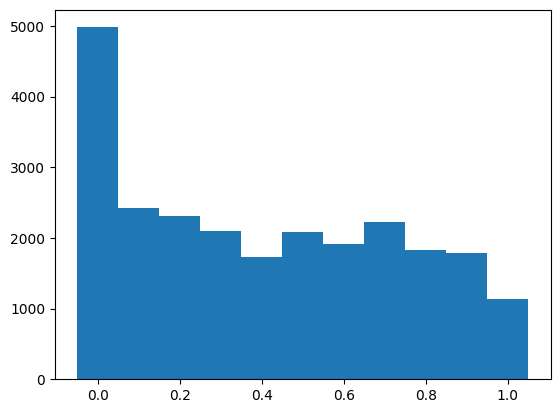

In [107]:
plt.hist(unmemorized_acc_cummax_all[prev_idxs%3504], np.arange(0, 1.2, 0.1)-0.05)

(array([472., 236., 223., 201., 179., 232., 231., 303., 332., 474., 621.]),
 array([-0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
         0.85,  0.95,  1.05]),
 <BarContainer object of 11 artists>)

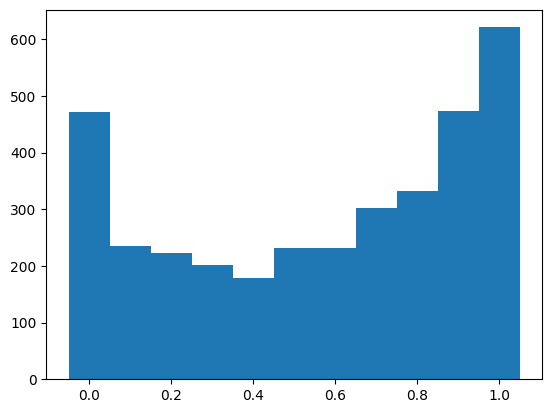

In [108]:
plt.hist(unmemorized_acc_cummax_all, np.arange(0, 1.2, 0.1)-0.05)

In [121]:


threshold2 = 0.75
# threshold2 = 0.5
# threshold2 = 0.25
new_num_copies = 2

amrith_data_subsample_idxs_prev = prev_idxs

if len(amrith_data_subsample_idxs_prev)>0:
    amrith_data_orig_idxs[amrith_data_subsample_idxs_prev] = -1


In [110]:
(amrith_data_orig_idxs==-1).sum()

24528

In [122]:
orig_data_subsample_idxs = np.where((unmemorized_acc_cummax_all<=threshold2))[0]


In [123]:
orig_data_subsample_idxs

array([   4,    6,   10, ..., 3501, 3502, 3503])

In [124]:
print("subsample ratio: ", len(orig_data_subsample_idxs)/len(unmemorized_acc_cummax_all))
amrith_data_subsample_idxs_new = np.where([elem in orig_data_subsample_idxs for elem in amrith_data_orig_idxs])[0]


subsample ratio:  0.5927511415525114


In [127]:
np.intersect1d(amrith_data_subsample_idxs_prev, amrith_data_subsample_idxs_new)

array([], dtype=int64)

In [128]:
len(amrith_data_subsample_idxs_new)/3504

6.212328767123288

In [114]:
len(amrith_data_subsample_idxs_new)/len(amrith_data_orig_idxs)

0.31061643835616437

In [115]:
len(amrith_data_subsample_idxs_new)

21768

In [118]:
3504*4

14016

In [98]:
amrith_data_subsample_idxs_new = np.random.choice(amrith_data_subsample_idxs_new, int(len(train_questions)*new_num_copies), replace=False)

amrith_data_subsample_idxs = np.concatenate([amrith_data_subsample_idxs_prev, amrith_data_subsample_idxs_new]).astype(int)
assert(len(set(amrith_data_subsample_idxs))==int(len(train_questions)*new_num_copies)+len(amrith_data_subsample_idxs_prev))

In [99]:
len(train_questions)

3504

In [101]:
amrith_data_subsample_idxs%3504

array([1460, 2794,  980, ..., 1643, 3123, 2291])

(array([2194., 1358., 1076.,  993., 1026., 1026., 1059., 1261.,  233.,
         178.,  108.]),
 array([-0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
         0.85,  0.95,  1.05]),
 <BarContainer object of 11 artists>)

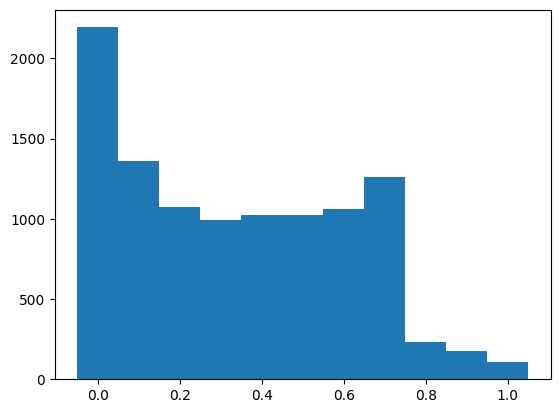

In [102]:
plt.hist(unmemorized_acc_cummax_all[amrith_data_subsample_idxs%3504], np.arange(0, 1.2, 0.1)-0.05)